# Credit Card Fraud Detection

# Importing Libraries

In [1]:
# Importing Libraries

# Data loading and Pre-processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Data Loading & Pre-processing

In [2]:
# Data loading
data = pd.read_csv("/content/CC.csv")

In [3]:
# Viewing top 5 rows of dataset
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

In [5]:
# Drop Unnecessary columns
data.drop('Unnamed: 0', axis=1, inplace=True)

# Data Visualization

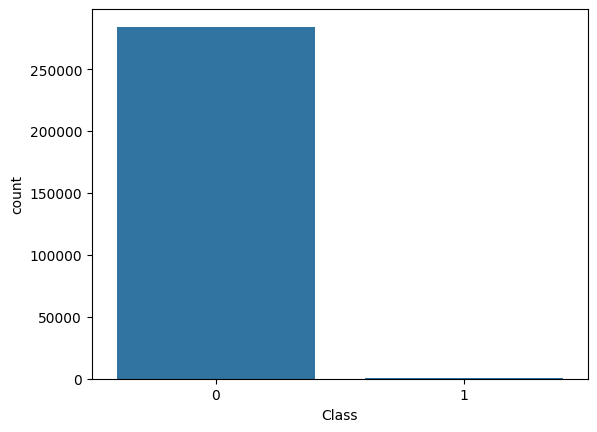

In [6]:
# Countplot for different labels
sns.countplot(x='Class', data=data)
plt.show()

<Figure size 1000x600 with 0 Axes>

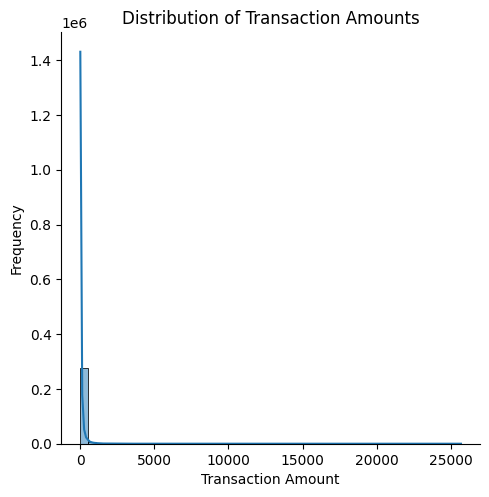

In [7]:
plt.figure(figsize=(10, 6))
sns.displot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Feature Enginerring

In [8]:
# Separate majority and minority classes
df_0 = data[data.Class == 0]
df_1 = data[data.Class == 1]

In [9]:
# Downsample majority class
df_0_downsampled = resample(df_0,
                                 replace=False,
                                 n_samples=len(df_1),
                                 random_state=123)

In [10]:
# Combine minority class with downsampled majority class
df = pd.concat([df_0_downsampled, df_1])

In [11]:
# Display new class counts
df.Class.value_counts()

,count
Class,
0,492
1,492


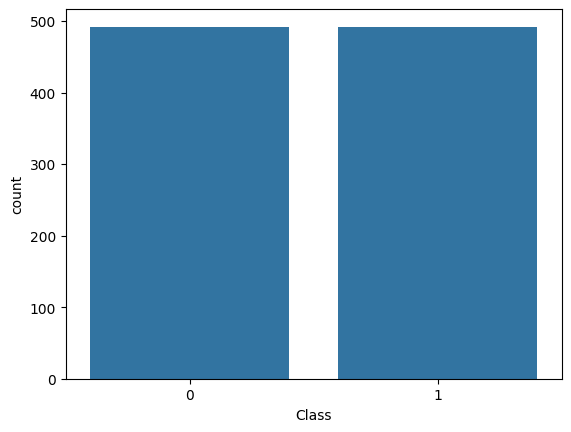

In [12]:
# Countplot for different labels after sampling
sns.countplot(x='Class', data=df)
plt.show()

In [13]:
# Spliting Target column and feature column
X = df.drop('Class',axis=1)
y = df['Class']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Models

Decision Tree CLassifier

In [15]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [16]:
# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [18]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.8908629441624365


In [19]:
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

Confusion Matrix:
 [[178  25]
 [ 18 173]]


In [20]:
# Classification report
cr_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", cr_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       203
           1       0.87      0.91      0.89       191

    accuracy                           0.89       394
   macro avg       0.89      0.89      0.89       394
weighted avg       0.89      0.89      0.89       394



Random Forest Classifier Model

In [21]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9416243654822335


In [25]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       203
           1       0.97      0.91      0.94       191

    accuracy                           0.94       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.94      0.94      0.94       394



Graident Boosting Classifier Model

In [26]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [27]:
# Train the model
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

In [29]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.9390862944162437


In [30]:
# Print a classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       203
           1       0.96      0.92      0.94       191

    accuracy                           0.94       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.94      0.94      0.94       394



# Model Evaluation

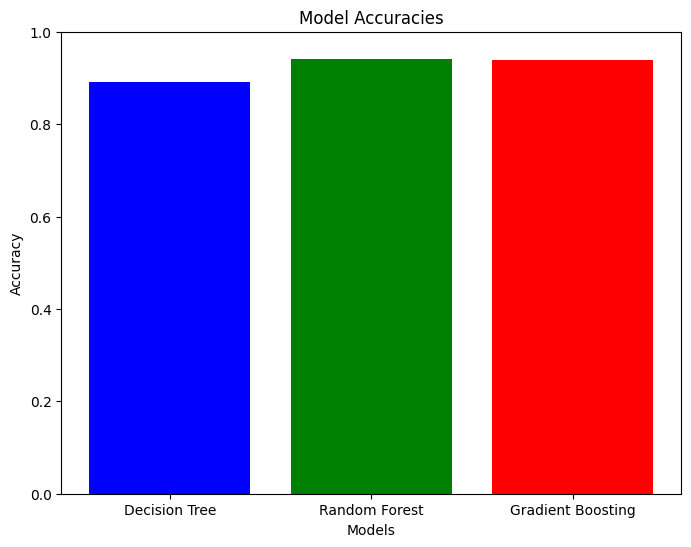

In [31]:
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_dt, accuracy, accuracy_gb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

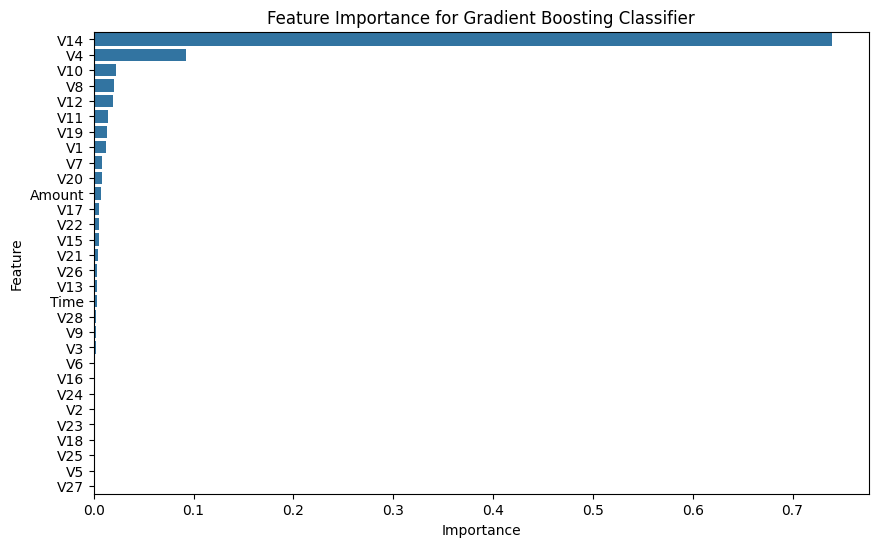

In [43]:
# Feature Importance of Gradient Boosting classifier
importances = gb_classifier.feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

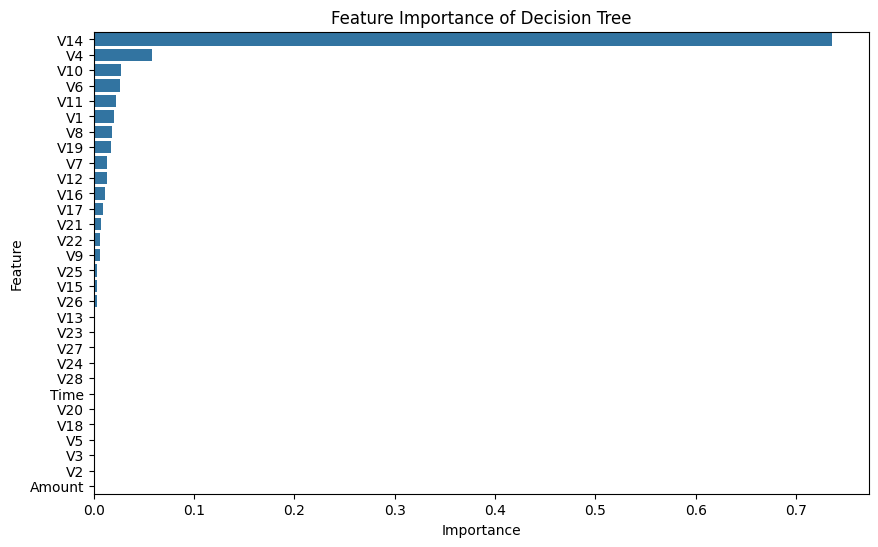

In [41]:
# Feature Importance of Decision Tree classifier
importances = dt_classifier.feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance of Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

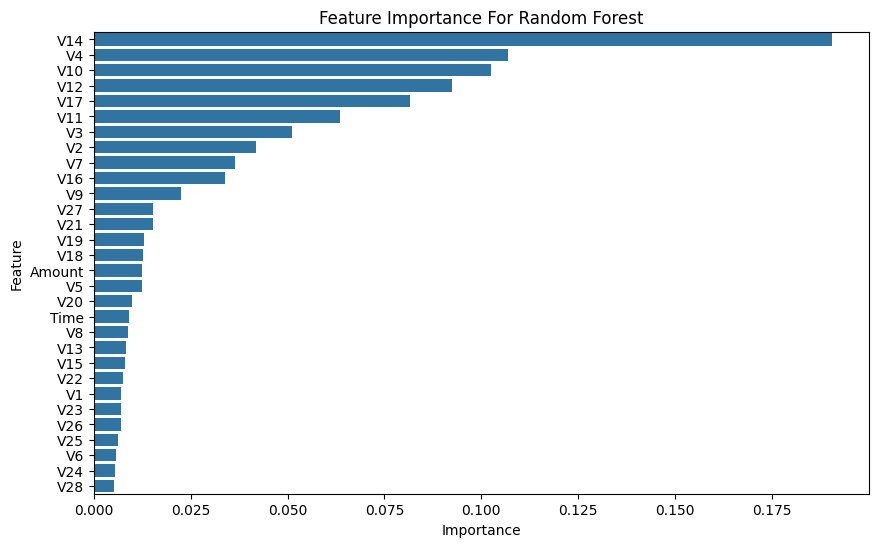

In [42]:
# Feature Importance of Random forest classifier
importances = rf_classifier.feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance For Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Deployement

In [32]:
# Select 10 random rows from the DataFrame
random_rows = df.sample(n=10, random_state=42)

In [33]:
# Separate features (X) and target (y) for the selected rows
X_random = random_rows.drop('Class', axis=1)
y_random = random_rows['Class']

In [34]:
# Use the Random Forest model to make predictions on the selected rows
y_pred_random = rf_classifier.predict(X_random)

In [35]:
# Print the actual and predicted values [ 1 = True & 0 = False ]
print("Actual Values:", y_random.values)
print("Predicted Values:", y_pred_random)

Actual Values: [1 0 1 0 0 1 1 0 1 1]
Predicted Values: [1 0 1 0 0 1 1 0 1 1]
